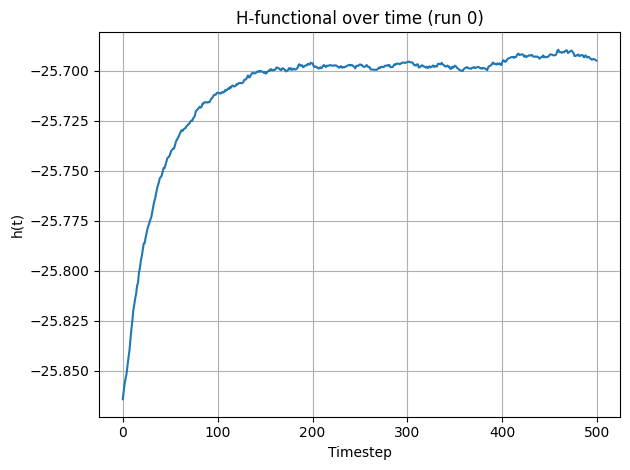

In [1]:


import torch
import torch.nn as nn
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from glob import glob

# --- 1. Load velocity data from .pkl files ---
file_paths = sorted(glob("velocities/run_*.pkl"))
all_runs = [np.array(pickle.load(open(path, "rb"))) for path in file_paths]
all_runs = np.array(all_runs)  # shape: (n_runs, timesteps, n_particles, 2)

n_runs, timesteps, n_particles, dims = all_runs.shape

n_hidden = 64


# --- 2. Define the DeepSets-style model class ---
class DeepSetsHPotential(nn.Module):
    def __init__(self, particle_dim=2, phi_hidden=16, rho_hidden=16):
        super().__init__()
        self.phi = nn.Sequential(
            nn.Linear(particle_dim, phi_hidden),
            nn.ReLU(),
            nn.Linear(phi_hidden, phi_hidden),
            nn.ReLU(),
        )
        self.rho = nn.Sequential(
            nn.Linear(phi_hidden, rho_hidden),
            nn.ReLU(),
            nn.Linear(rho_hidden, 1)
        )

    def forward(self, x):
        # x: shape (B, N * 2)
        B = x.shape[0]
        x = x.view(B, n_particles, dims)        # → (B, N, 2)
        phi_x = self.phi(x)                     # → (B, N, D)
        summed = phi_x.sum(dim=1)               # → (B, D)
        return self.rho(summed).squeeze(-1)     # → (B,)

# --- 3. Recreate model instance and load weights ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model16z = DeepSetsHPotential(particle_dim=2, phi_hidden=n_hidden, rho_hidden=n_hidden).to(device)

weights_path = os.path.join(os.getcwd(), "saved_model64", "deepsets_h_model_weights.pt")
model16z.load_state_dict(torch.load(weights_path, map_location=device))
model16z.eval()

# --- 4. Define evaluation function for one run ---
def compute_h_for_run(model16z, run_data, device="cpu"):
    timesteps = run_data.shape[0]
    h_vals = []

    with torch.no_grad():
        for t in range(timesteps):
            s_t = run_data[t].astype(np.float32)
            s_t_tensor = torch.from_numpy(s_t).view(1, -1).to(device)  # shape: (1, N*2)
            h_val = model16z(s_t_tensor).item()
            h_vals.append(h_val)

    return np.array(h_vals)

# --- 5. Evaluate and plot ---
run_index = 0  # change this to select different runs
selected_run = all_runs[run_index]

h_values = compute_h_for_run(model16z, selected_run, device=device)

plt.plot(h_values)
plt.xlabel("Timestep")
plt.ylabel("h(t)")
plt.title(f"H-functional over time (run {run_index})")
plt.grid(True)
plt.tight_layout()
plt.show()


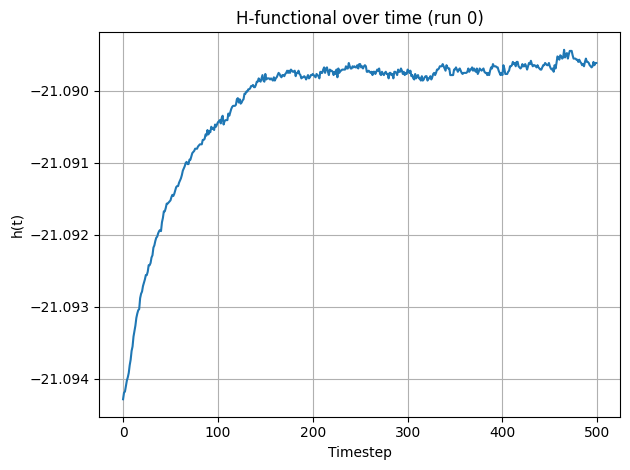

In [2]:


import torch
import torch.nn as nn
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from glob import glob

# --- 1. Load velocity data from .pkl files ---
file_paths = sorted(glob("velocities/run_*.pkl"))
all_runs = [np.array(pickle.load(open(path, "rb"))) for path in file_paths]
all_runs = np.array(all_runs)  # shape: (n_runs, timesteps, n_particles, 2)

n_runs, timesteps, n_particles, dims = all_runs.shape

n_hidden = 16


# --- 2. Define the DeepSets-style model class ---
class DeepSetsHPotential(nn.Module):
    def __init__(self, particle_dim=2, phi_hidden=16, rho_hidden=16):
        super().__init__()
        self.phi = nn.Sequential(
            nn.Linear(particle_dim, phi_hidden),
            nn.ReLU(),
            nn.Linear(phi_hidden, phi_hidden),
            nn.ReLU(),
        )
        self.rho = nn.Sequential(
            nn.Linear(phi_hidden, rho_hidden),
            nn.ReLU(),
            nn.Linear(rho_hidden, 1)
        )

    def forward(self, x):
        # x: shape (B, N * 2)
        B = x.shape[0]
        x = x.view(B, n_particles, dims)        # → (B, N, 2)
        phi_x = self.phi(x)                     # → (B, N, D)
        summed = phi_x.sum(dim=1)               # → (B, D)
        return self.rho(summed).squeeze(-1)     # → (B,)

# --- 3. Recreate model instance and load weights ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model161z = DeepSetsHPotential(particle_dim=2, phi_hidden=n_hidden, rho_hidden=n_hidden).to(device)

weights_path = os.path.join(os.getcwd(), "saved_model16", "deepsets_h_model_weights.pt")
model161z.load_state_dict(torch.load(weights_path, map_location=device))
model161z.eval()

# --- 4. Define evaluation function for one run ---
def compute_h_for_run(model161z, run_data, device="cpu"):
    timesteps = run_data.shape[0]
    h_vals = []

    with torch.no_grad():
        for t in range(timesteps):
            s_t = run_data[t].astype(np.float32)
            s_t_tensor = torch.from_numpy(s_t).view(1, -1).to(device)  # shape: (1, N*2)
            h_val = model161z(s_t_tensor).item()
            h_vals.append(h_val)

    return np.array(h_vals)

# --- 5. Evaluate and plot ---
run_index = 0  # change this to select different runs
selected_run = all_runs[run_index]

h_values = compute_h_for_run(model161z, selected_run, device=device)

plt.plot(h_values)
plt.xlabel("Timestep")
plt.ylabel("h(t)")
plt.title(f"H-functional over time (run {run_index})")
plt.grid(True)
plt.tight_layout()
plt.show()


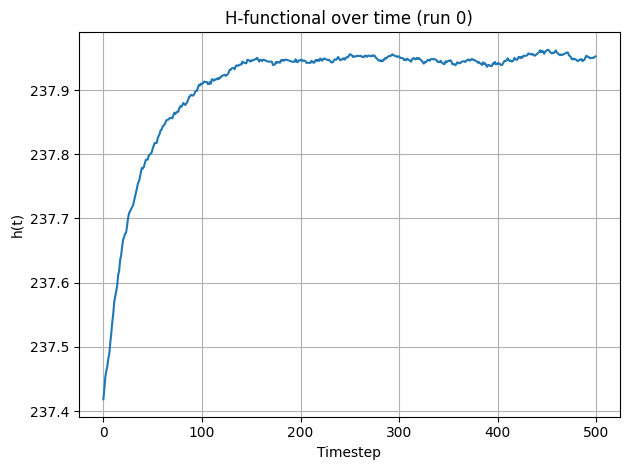

In [3]:


import torch
import torch.nn as nn
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from glob import glob

# --- 1. Load velocity data from .pkl files ---
file_paths = sorted(glob("velocities/run_*.pkl"))
all_runs = [np.array(pickle.load(open(path, "rb"))) for path in file_paths]
all_runs = np.array(all_runs)  # shape: (n_runs, timesteps, n_particles, 2)

n_runs, timesteps, n_particles, dims = all_runs.shape

n_hidden = 32


# --- 2. Define the DeepSets-style model class ---
class DeepSetsHPotential(nn.Module):
    def __init__(self, particle_dim=2, phi_hidden=16, rho_hidden=16):
        super().__init__()
        self.phi = nn.Sequential(
            nn.Linear(particle_dim, phi_hidden),
            nn.ReLU(),
            nn.Linear(phi_hidden, phi_hidden),
            nn.ReLU(),
        )
        self.rho = nn.Sequential(
            nn.Linear(phi_hidden, rho_hidden),
            nn.ReLU(),
            nn.Linear(rho_hidden, 1)
        )

    def forward(self, x):
        # x: shape (B, N * 2)
        B = x.shape[0]
        x = x.view(B, n_particles, dims)        # → (B, N, 2)
        phi_x = self.phi(x)                     # → (B, N, D)
        summed = phi_x.sum(dim=1)               # → (B, D)
        return self.rho(summed).squeeze(-1)     # → (B,)

# --- 3. Recreate model instance and load weights ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model162z = DeepSetsHPotential(particle_dim=2, phi_hidden=n_hidden, rho_hidden=n_hidden).to(device)

weights_path = os.path.join(os.getcwd(), "saved_model32", "deepsets_h_model_weights.pt")
model162z.load_state_dict(torch.load(weights_path, map_location=device))
model162z.eval()

# --- 4. Define evaluation function for one run ---
def compute_h_for_run(model162z, run_data, device="cpu"):
    timesteps = run_data.shape[0]
    h_vals = []

    with torch.no_grad():
        for t in range(timesteps):
            s_t = run_data[t].astype(np.float32)
            s_t_tensor = torch.from_numpy(s_t).view(1, -1).to(device)  # shape: (1, N*2)
            h_val = model162z(s_t_tensor).item()
            h_vals.append(h_val)

    return np.array(h_vals)

# --- 5. Evaluate and plot ---
run_index = 0  # change this to select different runs
selected_run = all_runs[run_index]

h_values = compute_h_for_run(model162z, selected_run, device=device)

plt.plot(h_values)
plt.xlabel("Timestep")
plt.ylabel("h(t)")
plt.title(f"H-functional over time (run {run_index})")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

maxxxx = 500

# Parameters
n = 1000  
r1 = 3e-3
sbar = 35 * 0.005 / np.sqrt(2)
FPS = 60
dt = 1
m1 = 1
frames = 500
n_runs = 10

nbins = 50
vmax = 2 * sbar
bins = np.linspace(0, vmax, nbins + 1)
sgrid = 0.5 * (bins[1:] + bins[:-1])
dv = sgrid[1] - sgrid[0]

# Arrays to store all a, b, and MSE values
a_values = np.zeros(maxxxx)
b_values = np.zeros(maxxxx)
mse_values = np.zeros(maxxxx)

for run_index in range(maxxxx):
    selected_run = all_runs[run_index]
    h_values_model = compute_h_for_run(model16z, selected_run, device=device)
    timesteps_model = np.arange(len(h_values_model))
    
    # --- Load postcomputed velocities ---
    filename = f"velocities/run_{run_index:03d}.pkl"
    with open(filename, "rb") as f:
        velocities = np.array(pickle.load(f))  # shape: (timesteps, n_particles, 2)
    
    # --- Compute postcomputed H-functional ---
    H_vals = []
    H_times = []
    
    for i, vel in enumerate(velocities):
        speeds = np.hypot(vel[:, 0], vel[:, 1])
        hist, _ = np.histogram(speeds, bins=bins, density=True)
        with np.errstate(divide='ignore', invalid='ignore'):
            h_val = np.nansum(hist * np.log(hist)) * dv
        H_vals.append(h_val)
        H_times.append(i * dt)
    
    H_vals = np.array(H_vals)
    H_times = np.array(H_times)
    
    # --- Fit affine transformation
    common_len = min(len(h_values_model), len(H_vals))
    cutoff = int(common_len)
    
    X_fit = h_values_model[:cutoff].reshape(-1, 1)
    y_fit = H_vals[:cutoff]
    
    reg = LinearRegression().fit(X_fit, y_fit)
    a, b = reg.coef_[0], reg.intercept_
    
    # Compute mean squared error for this fit
    y_pred = reg.predict(X_fit)
    mse = mean_squared_error(y_fit, y_pred)
    
    # Store results
    a_values[run_index] = a
    b_values[run_index] = b
    mse_values[run_index] = mse

    if run_index % 20 == 0:
        print(run_index, a, b, mse)

# --- Compute statistics ---
a_mean, a_var = np.mean(a_values), np.var(a_values)
b_mean, b_var = np.mean(b_values), np.var(b_values)
mse_mean, mse_var = np.mean(mse_values), np.var(mse_values)




print("Mean MSE:", mse_mean, "Variance MSE:", mse_var)
print("Mean a:", a_mean)
print("Mean b:", b_mean)
print("Var a:", a_var )
print("Var b:", b_var )
print("CV a:", np.sqrt(a_var)/np.abs(a_mean))
print("CV b:", np.sqrt(b_var)/np.abs(b_mean))


0 -15.0643351063783 -385.5473600683654 0.014936130504986033
20 -15.302238661364429 -390.4477995680543 0.014631857251071098
40 -14.268805567808029 -365.0391176140122 0.01920769530971248
60 -15.409191491526293 -394.4524504880718 0.014366790756781687
80 -14.512244718982338 -368.7092637489435 0.018477076383175885
100 -15.442412567004851 -395.0153876203292 0.015790992906958488
120 -15.37940302783005 -391.56457730005803 0.017109332896210028
140 -14.87066960192503 -380.8570323878421 0.01639282657946717
160 -14.469913828180136 -370.498794175085 0.015786757506429626
180 -14.769548905799311 -376.0527347557043 0.01634823210109099
200 -15.01901317891754 -383.0769031342916 0.0182942388948179
220 -14.443026779177643 -366.6879216344002 0.018977609310384422
240 -15.21608918961192 -388.2033599455266 0.013909197636036687
260 -14.545241557819885 -370.81374618042344 0.016369791360529046
280 -15.435823937115266 -392.1672152516643 0.015294406546024904
300 -14.771824270871381 -376.43838769887685 0.0179898383

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

maxxxx = 500

# Parameters
n = 1000  
r1 = 3e-3
sbar = 35 * 0.005 / np.sqrt(2)
FPS = 60
dt = 1
m1 = 1
frames = 500
n_runs = 10

nbins = 50
vmax = 2 * sbar
bins = np.linspace(0, vmax, nbins + 1)
sgrid = 0.5 * (bins[1:] + bins[:-1])
dv = sgrid[1] - sgrid[0]

# Arrays to store all a, b, and MSE values
a_values = np.zeros(maxxxx)
b_values = np.zeros(maxxxx)
mse_values = np.zeros(maxxxx)

for run_index in range(maxxxx):
    selected_run = all_runs[run_index]
    h_values_model = compute_h_for_run(model161z, selected_run, device=device)
    timesteps_model = np.arange(len(h_values_model))
    
    # --- Load postcomputed velocities ---
    filename = f"velocities/run_{run_index:03d}.pkl"
    with open(filename, "rb") as f:
        velocities = np.array(pickle.load(f))  # shape: (timesteps, n_particles, 2)
    
    # --- Compute postcomputed H-functional ---
    H_vals = []
    H_times = []
    
    for i, vel in enumerate(velocities):
        speeds = np.hypot(vel[:, 0], vel[:, 1])
        hist, _ = np.histogram(speeds, bins=bins, density=True)
        with np.errstate(divide='ignore', invalid='ignore'):
            h_val = np.nansum(hist * np.log(hist)) * dv
        H_vals.append(h_val)
        H_times.append(i * dt)
    
    H_vals = np.array(H_vals)
    H_times = np.array(H_times)
    
    # --- Fit affine transformation
    common_len = min(len(h_values_model), len(H_vals))
    cutoff = int(common_len)
    
    X_fit = h_values_model[:cutoff].reshape(-1, 1)
    y_fit = H_vals[:cutoff]
    
    reg = LinearRegression().fit(X_fit, y_fit)
    a, b = reg.coef_[0], reg.intercept_
    
    # Compute mean squared error for this fit
    y_pred = reg.predict(X_fit)
    mse = mean_squared_error(y_fit, y_pred)
    
    # Store results
    a_values[run_index] = a
    b_values[run_index] = b
    mse_values[run_index] = mse

    if run_index % 20 == 0:
        print(run_index, a, b, mse)

# --- Compute statistics ---
a_mean, a_var = np.mean(a_values), np.var(a_values)
b_mean, b_var = np.mean(b_values), np.var(b_values)
mse_mean, mse_var = np.mean(mse_values), np.var(mse_values)




print("Mean MSE:", mse_mean, "Variance MSE:", mse_var)
print("Mean a:", a_mean)
print("Mean b:", b_mean)
print("Var a:", a_var )
print("Var b:", b_var )
print("CV a:", np.sqrt(a_var)/np.abs(a_mean))
print("CV b:", np.sqrt(b_var)/np.abs(b_mean))

0 -455.37711638205246 -9602.231782031657 0.0355060725822152
20 -465.15182006528175 -9813.332707804788 0.04285897060245276
40 -415.93245226437233 -8767.490571207016 0.05064321217320743
60 -456.9583656075301 -9625.623007067667 0.039328019043009706
80 -425.8905311198707 -8977.520370955212 0.04684197048753538
100 -471.72547810396446 -9946.440199846273 0.0438082112810453
120 -453.6510226665683 -9546.507128237185 0.05053765869050282
140 -426.32098283350217 -8991.406022714058 0.05006767170495899
160 -427.55903868537933 -9034.371845665064 0.04431383059593435
180 -425.07188780769616 -8954.411064346548 0.044407894642195654
200 -451.56620822356155 -9530.721251101955 0.04722978939261563
220 -420.7912454780159 -8847.102986781676 0.050270773749589576
240 -503.7388938152608 -10613.565061351976 0.030500215596495815
260 -444.9672474761125 -9390.17104893144 0.039538353353742416
280 -444.7593432699426 -9351.812794712776 0.04442522654009829
300 -434.87017970691085 -9140.75391864121 0.047041598651131694
32

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

maxxxx = 500

# Parameters
n = 1000  
r1 = 3e-3
sbar = 35 * 0.005 / np.sqrt(2)
FPS = 60
dt = 1
m1 = 1
frames = 500
n_runs = 10

nbins = 50
vmax = 2 * sbar
bins = np.linspace(0, vmax, nbins + 1)
sgrid = 0.5 * (bins[1:] + bins[:-1])
dv = sgrid[1] - sgrid[0]

# Arrays to store all a, b, and MSE values
a_values = np.zeros(maxxxx)
b_values = np.zeros(maxxxx)
mse_values = np.zeros(maxxxx)

for run_index in range(maxxxx):
    selected_run = all_runs[run_index]
    h_values_model = compute_h_for_run(model162z, selected_run, device=device)
    timesteps_model = np.arange(len(h_values_model))
    
    # --- Load postcomputed velocities ---
    filename = f"velocities/run_{run_index:03d}.pkl"
    with open(filename, "rb") as f:
        velocities = np.array(pickle.load(f))  # shape: (timesteps, n_particles, 2)
    
    # --- Compute postcomputed H-functional ---
    H_vals = []
    H_times = []
    
    for i, vel in enumerate(velocities):
        speeds = np.hypot(vel[:, 0], vel[:, 1])
        hist, _ = np.histogram(speeds, bins=bins, density=True)
        with np.errstate(divide='ignore', invalid='ignore'):
            h_val = np.nansum(hist * np.log(hist)) * dv
        H_vals.append(h_val)
        H_times.append(i * dt)
    
    H_vals = np.array(H_vals)
    H_times = np.array(H_times)
    
    # --- Fit affine transformation
    common_len = min(len(h_values_model), len(H_vals))
    cutoff = int(common_len)
    
    X_fit = h_values_model[:cutoff].reshape(-1, 1)
    y_fit = H_vals[:cutoff]
    
    reg = LinearRegression().fit(X_fit, y_fit)
    a, b = reg.coef_[0], reg.intercept_
    
    # Compute mean squared error for this fit
    y_pred = reg.predict(X_fit)
    mse = mean_squared_error(y_fit, y_pred)
    
    # Store results
    a_values[run_index] = a
    b_values[run_index] = b
    mse_values[run_index] = mse

    if run_index % 20 == 0:
        print(run_index, a, b, mse)

# --- Compute statistics ---
a_mean, a_var = np.mean(a_values), np.var(a_values)
b_mean, b_var = np.mean(b_values), np.var(b_values)
mse_mean, mse_var = np.mean(mse_values), np.var(mse_values)




print("Mean MSE:", mse_mean, "Variance MSE:", mse_var)
print("Mean a:", a_mean)
print("Mean b:", b_mean)
print("Var a:", a_var )
print("Var b:", b_var )
print("CV a:", np.sqrt(a_var)/np.abs(a_mean))
print("CV b:", np.sqrt(b_var)/np.abs(b_mean))

0 -4.954914607651135 1180.568278367523 0.012712128099024465
20 -4.689784762933789 1124.1444581722776 0.014320596193230615
40 -4.503393419063565 1072.658982764749 0.01805243521818444
60 -5.119038034980211 1216.8540371183012 0.010616912844623681
80 -4.347657628078578 1047.0725203789095 0.011116566154536205
100 -4.844125763402174 1155.1637210798358 0.014800973366281212
120 -4.688214715010359 1121.7979554612316 0.013794569594759457
140 -4.525596825876541 1077.6414370212267 0.01981195420432389
160 -4.642445718746803 1109.9209305659872 0.011928417378358773
180 -4.545824496457313 1089.6678486142598 0.017915900092322457
200 -4.750904112162437 1140.3222644403984 0.013418832067827525
220 -4.36554266007011 1046.9095096996377 0.015756568966998674
240 -4.8924802279772726 1169.6660062782908 0.007852338160790657
260 -4.624046580365608 1110.2417662145624 0.01756709012690107
280 -4.453159072615352 1067.4135849002755 0.015356374288602736
300 -4.972885105859943 1184.9237547964187 0.014149289710080365
320

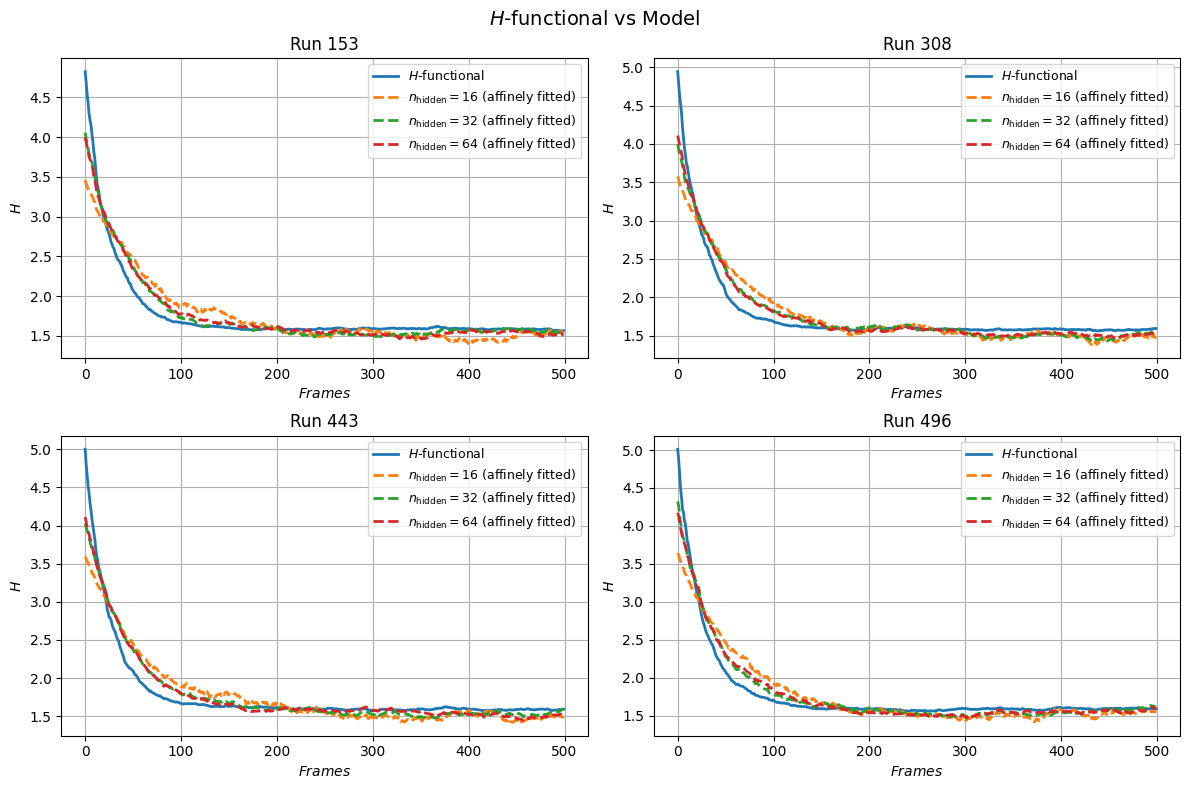

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.linear_model import LinearRegression

# Parameters
n = 1000  
r1 = 3e-3
sbar = 35 * 0.005 / np.sqrt(2)
FPS = 60
dt = 1
m1 = 1
frames = 500
n_runs = 10

nbins = 50
vmax = 2 * sbar
bins = np.linspace(0, vmax, nbins + 1)
sgrid = 0.5 * (bins[1:] + bins[:-1])
dv = sgrid[1] - sgrid[0]

# --- Settings ---
n_panels = 4
run_indices =  [153, 308, 443, 496]  # choose 4 runs
 # sorted(random.sample(range(500), n_panels))  # pick 4 random runs < 500

# --- Plot setup ---
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=False, sharey=False)
axs = axs.flatten()

for ax, run_index in zip(axs, run_indices):
    # --- Compute model-predicted h-values ---
    selected_run = all_runs[run_index]
    h_values_model16z = compute_h_for_run(model16z, selected_run, device=device)
    timesteps_model16z = np.arange(len(h_values_model16z))
    h_values_model161z = compute_h_for_run(model161z, selected_run, device=device)
    timesteps_model161z = np.arange(len(h_values_model161z))
    h_values_model162z = compute_h_for_run(model162z, selected_run, device=device)
    timesteps_model162z = np.arange(len(h_values_model162z))
    # h_values_model160z = compute_h_for_run(model160z, selected_run, device=device)
    # timesteps_model160z = np.arange(len(h_values_model160z))

    # --- Load postcomputed velocities ---
    filename = f"velocities/run_{run_index:03d}.pkl"
    with open(filename, "rb") as f:
        velocities = np.array(pickle.load(f))  # shape: (timesteps, n_particles, 2)

    # --- Compute postcomputed H-functional ---
    H_vals = []
    H_times = []

    for i, vel in enumerate(velocities):
        speeds = np.hypot(vel[:, 0], vel[:, 1])
        hist, _ = np.histogram(speeds, bins=bins, density=True)
        with np.errstate(divide='ignore', invalid='ignore'):
            h_val = np.nansum(hist * np.log(hist)) * dv
        H_vals.append(h_val)
        H_times.append(i * dt)

    H_vals = np.array(H_vals)
    H_times = np.array(H_times)

    # --- Fit affine transformation for model16z ---
    common_len = min(len(h_values_model16z), len(H_vals))
    cutoff = int(common_len)
    X_fit = h_values_model16z[:cutoff].reshape(-1, 1)
    y_fit = H_vals[:cutoff]
    reg = LinearRegression().fit(X_fit, y_fit)
    a, b = reg.coef_[0], reg.intercept_
    h_model_transformed16z = a * h_values_model16z + b

    # --- Fit affine transformation for model161z ---
    common_len = min(len(h_values_model161z), len(H_vals))
    cutoff = int(common_len)
    X_fit = h_values_model161z[:cutoff].reshape(-1, 1)
    y_fit = H_vals[:cutoff]
    reg = LinearRegression().fit(X_fit, y_fit)
    a, b = reg.coef_[0], reg.intercept_
    h_model_transformed161z = a * h_values_model161z + b

    # --- Fit affine transformation for model162z ---
    common_len = min(len(h_values_model162z), len(H_vals))
    cutoff = int(common_len)
    X_fit = h_values_model162z[:cutoff].reshape(-1, 1)
    y_fit = H_vals[:cutoff]
    reg = LinearRegression().fit(X_fit, y_fit)
    a, b = reg.coef_[0], reg.intercept_
    h_model_transformed162z = a * h_values_model162z + b

    # # --- Fit affine transformation for model160z ---
    # common_len = min(len(h_values_model160z), len(H_vals))
    # cutoff = int(common_len)
    # X_fit = h_values_model160z[:cutoff].reshape(-1, 1)
    # y_fit = H_vals[:cutoff]
    # reg = LinearRegression().fit(X_fit, y_fit)
    # a, b = reg.coef_[0], reg.intercept_
    # h_model_transformed160z = a * h_values_model160z + b

    # --- Plot ---
    ax.plot(H_times, H_vals, label=r"$H$-functional", lw=2)
    # ax.plot(timesteps_model160z * dt, h_model_transformed160z, '--', 
    #         label=r"$\alpha_{\text{final}} = 0$ (affinely fitted)", lw=2)
    ax.plot(timesteps_model161z * dt, h_model_transformed161z, '--', 
            label=r"$n_{\text{hidden}} =16$ (affinely fitted)", lw=2)
    ax.plot(timesteps_model162z * dt, h_model_transformed162z, '--', 
            label=r"$n_{\text{hidden}} =32$ (affinely fitted)", lw=2)
    ax.plot(timesteps_model16z * dt, h_model_transformed16z, '--', 
            label=r"$n_{\text{hidden}} =64 $ (affinely fitted)", lw=2)
   

    ax.set_title(f"Run {run_index}", fontsize=12)
    ax.set_xlabel(r"$Frames$")
    ax.set_ylabel(r"$H$")
    ax.legend(fontsize=9)
    ax.grid(True)

# --- Layout ---
plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle(r"$H$-functional vs Model", fontsize=14)

# --- Save as PNG ---
plt.savefig("H_functional_comparison.png", dpi=300)  # 300 dpi for high quality

plt.show()
